# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [2]:
from sklearn.datasets import fetch_openml

def load_boston_dataset():
    dataset = fetch_openml(name='boston', version=1)
    return dataset.data, dataset.target

X, y = load_boston_dataset()

/Users/amandabrognolidonini/Library/Python/3.10/lib/python/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
boston_dataset = pd.concat([X, y], axis=1)

In [4]:
boston_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
boston_dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
boston_dataset.dtypes

CRIM        float64
ZN          float64
INDUS       float64
CHAS       category
NOX         float64
RM          float64
AGE         float64
DIS         float64
RAD        category
TAX         float64
PTRATIO     float64
B           float64
LSTAT       float64
MEDV        float64
dtype: object

In [7]:
boston_dataset['CHAS'] = boston_dataset['CHAS'].astype(float)
boston_dataset['RAD'] = boston_dataset['RAD'].astype(float)

In [8]:
boston_dataset.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [9]:
boston_dataset.shape

(506, 14)

In [10]:
# import seaborn as sns
# sns.boxplot(data=boston_dataset)

In [11]:
# Q1 = boston_dataset.quantile(0.25)
# Q3 = boston_dataset.quantile(0.75)
# IQR = Q3 - Q1
# outliers = ((boston_dataset < (Q1 - 1.5 * IQR)) | (boston_dataset > (Q3 + 1.5 * IQR))).any(axis=1)
# boston_dataset = boston_dataset[~outliers]


In [12]:
# boston_dataset.shape

In [13]:
# import seaborn as sns
# sns.boxplot(data=boston_dataset)


### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

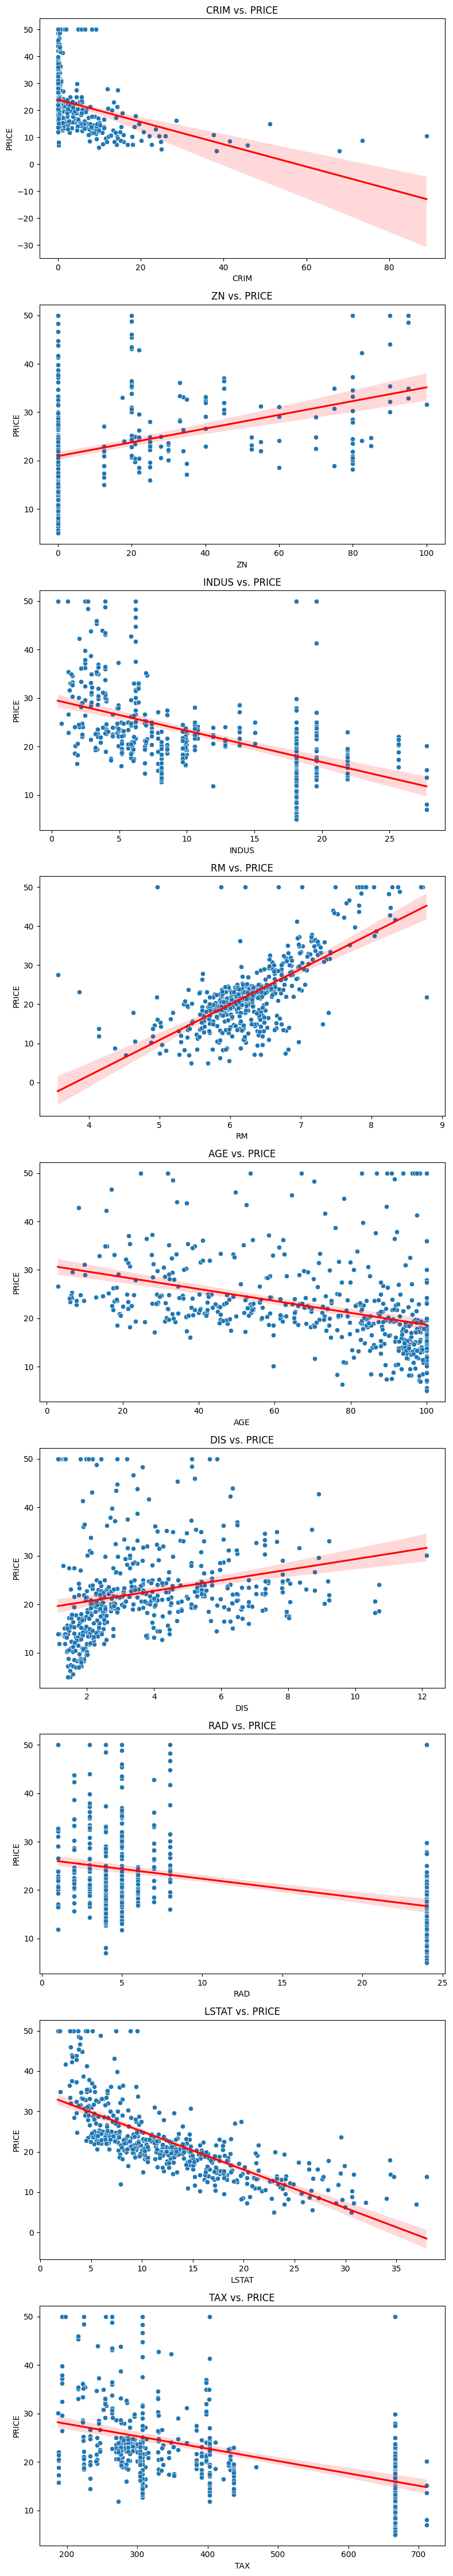

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

variables = ['CRIM', 'ZN', 'INDUS','RM', 'AGE', 'DIS', 'RAD','LSTAT', 'TAX']

fig, axes = plt.subplots(nrows=len(variables), ncols=1, figsize=(8, 5 * len(variables)))

for i, variable in enumerate(variables):
    sns.scatterplot(x=boston_dataset[variable], y=boston_dataset['MEDV'], ax=axes[i])
    sns.regplot(x=boston_dataset[variable], y=boston_dataset['MEDV'], scatter=False, ax=axes[i], color='red')

    axes[i].set_title(f'{variable} vs. PRICE')
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('PRICE')

# Adjust layout
plt.tight_layout()
plt.show()


### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [ ]:
# Your response here
#No, only for LSTAT and RM. Most of the variables don't follow the linear line

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

/var/folders/xb/vbkygnls2kq6z12lrq5ymftc0000gn/T/ipykernel_80347/108808011.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


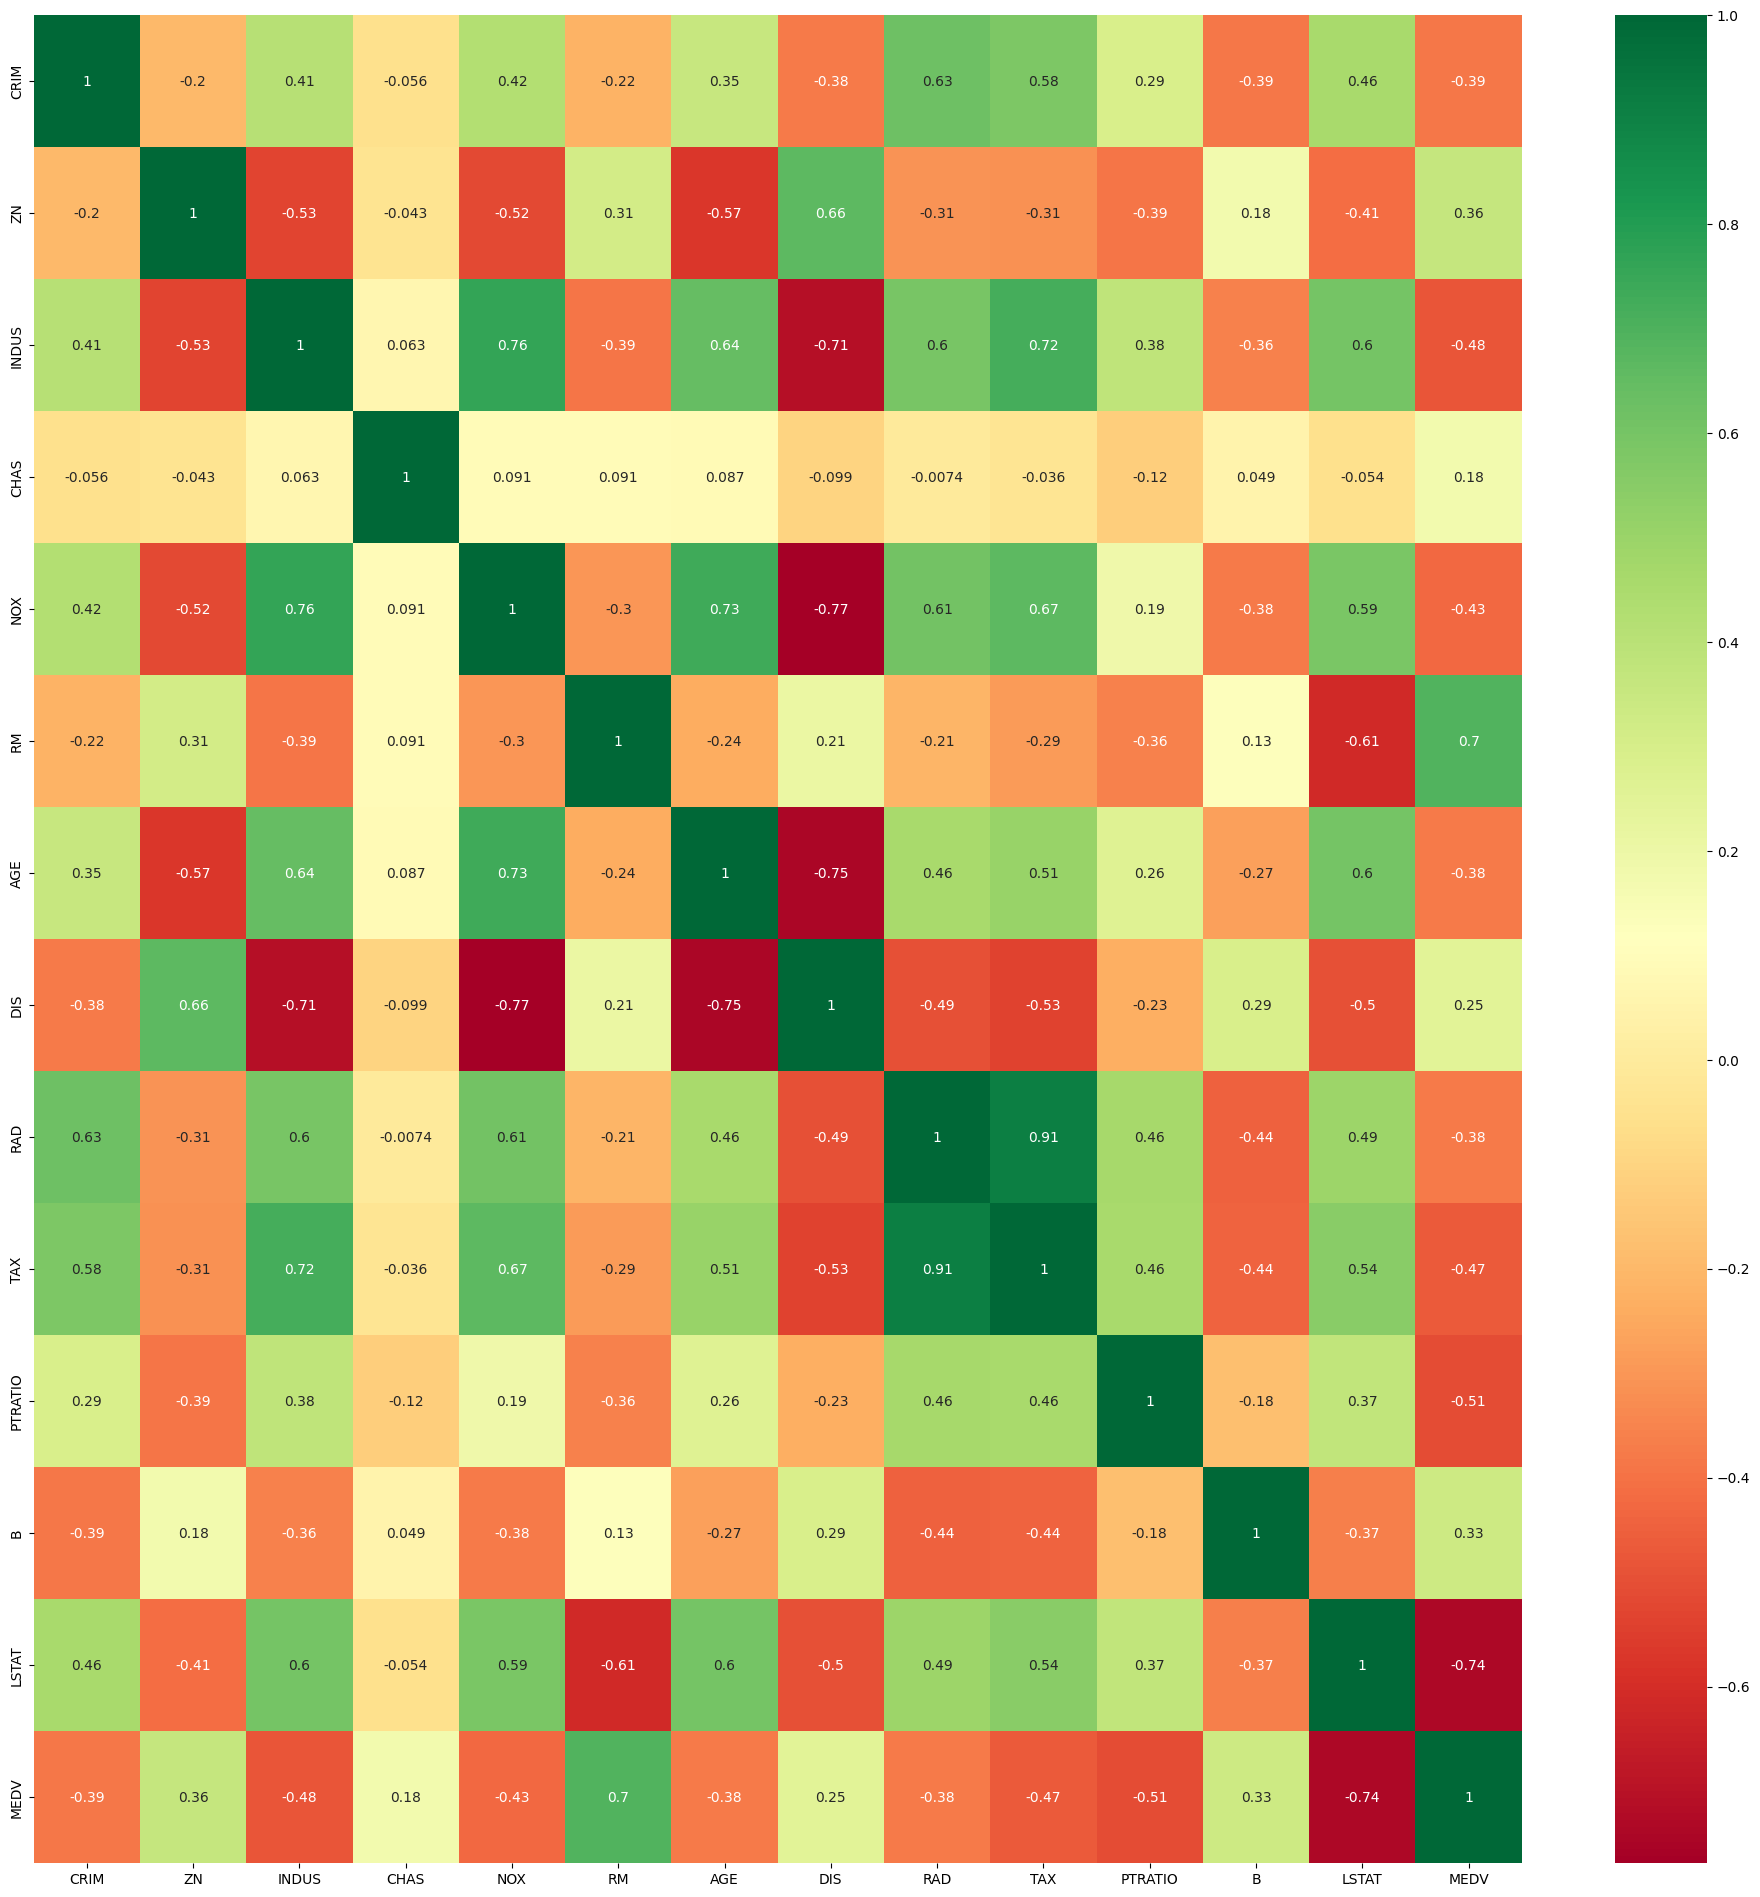

In [16]:
fig = plt.figure(figsize= (24, 24))
sns.heatmap(boston_dataset.corr(), annot=True, cmap='RdYlGn')
fig.show()

In [ ]:
# Your response here
#TAX and RAD have a high correlation (0.91)

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [17]:
# Your code here
y.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [18]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    score = r2_score(y_true, y_predict)
    return score

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [19]:
# Your code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [20]:
# Five separate RFR here with the given max depths
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=10, 
                               max_depth=2, 
                               random_state=1) 
forest.fit(X_train, y_train)
y_pred2 = forest.predict(X_test)

performance_metric(y_test, y_pred2)

0.8075744321889446

In [21]:

forest = RandomForestRegressor(n_estimators=10, 
                               max_depth=4, 
                               random_state=1) 
forest.fit(X_train, y_train)
y_pred4 = forest.predict(X_test)

performance_metric(y_test, y_pred4)

0.8938379975320556

In [22]:


forest = RandomForestRegressor(n_estimators=10, 
                               max_depth=6, 
                               random_state=1) 
forest.fit(X_train, y_train)
y_pred6 = forest.predict(X_test)

performance_metric(y_test, y_pred6)

0.9036360000611116

In [31]:


forest = RandomForestRegressor(n_estimators=10, 
                               max_depth=8, 
                               random_state=1) 
forest.fit(X_train, y_train)
y_pred8 = forest.predict(X_test)

performance_metric(y_test, y_pred8)

0.907847887686242

In [23]:


forest = RandomForestRegressor(n_estimators=10, 
                               max_depth=10, 
                               random_state=1) 
forest.fit(X_train, y_train)
y_pred10 = forest.predict(X_test)

performance_metric(y_test, y_pred10)

0.9093395131273387

Now, plot the score for each tree on the training set and on the testing set.

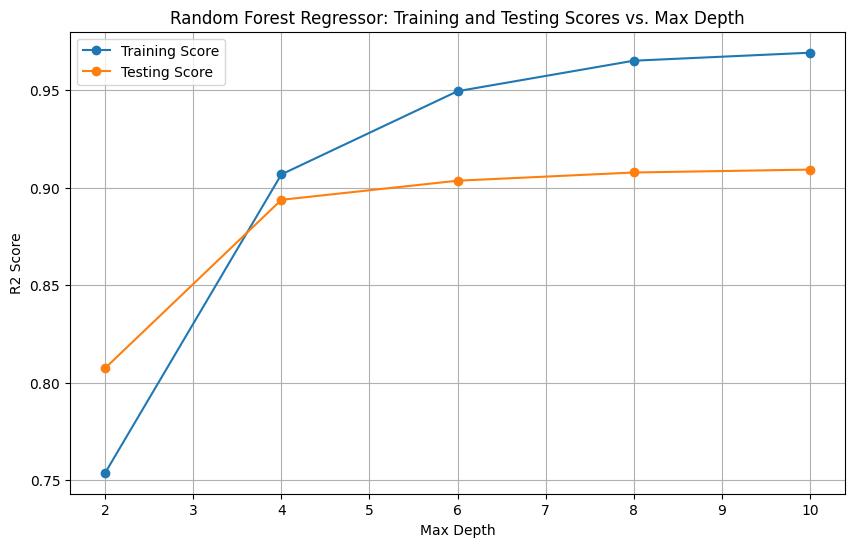

In [29]:
# Produce a plot with the score for the testing and training for the different max depths
max_depth_values = [2, 4, 6, 8, 10]
train_scores = []
test_scores = []

for max_depth in max_depth_values:
    forest = RandomForestRegressor(n_estimators=10, max_depth=max_depth, random_state=1)
    forest.fit(X_train, y_train)

    y_train_pred = forest.predict(X_train)
    y_test_pred = forest.predict(X_test)

    train_scores.append(r2_score(y_train, y_train_pred))
    test_scores.append(r2_score(y_test, y_test_pred))

plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_scores, label='Training Score', marker='o')
plt.plot(max_depth_values, test_scores, label='Testing Score', marker='o')
plt.title('Random Forest Regressor: Training and Testing Scores vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('R2 Score')
plt.legend()
plt.grid(True)
plt.show()

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [ ]:
# Your response here
#With the higher max_depths we have better scores for the test and training sets

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? Check out this article before answering: https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

In [ ]:
# Your response here
#When the model is trained with a maximum depth of 2 (minimun value that it was trained) and 10 the model suffer from high bias

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [ ]:
# Your response here
# I think the maximal depth of 10 is the best option, because it gives the best score compare to the other ones. 

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
# Your response here
#I think the data is not so relevant nowadays because it's very old and there are some features missing and some features that are not so useful to predict the value of a property. Because of that, I think the model
#wouldn't be able to predict the current values of the properties. And probably it wouldn't work for a rural city either. 